Experiment 03: Oct 2022
UID: 2019120042

Lab 2: Analyze statistical data using Python/R *programming*

Objective:

Perform statistical data analysis such as: Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation, standard error), Main distributions ( Normal distribution, chi-square distribution), Hypothesis testing, pair-wise association (Pearson correlation test, t-test, ANOVA), Non-parametric test (Spearman rank)

In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
#import seaborn as sns #using seaborn library for visualisation
#import matplotlib.pyplot as plt #visualisation
#from matplotlib import pyplot as plt
#data used: dft-road-casualty-statistics-accident-provisional-mid-year-unvalidated-2021
#https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data
%matplotlib inline 
import seaborn as sns

In [ ]:
df = pd.read_csv("dataforlab2.csv") #reading the data
df.head(5) # To display the top 5 rows


,status,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,Unvalidated,2021010287148,2021,010287148,521508.0,193079.0,NaN,NaN,1,3,...,0,4,7,4,1,0,-1,1,-1,-1
1,Unvalidated,2021010287149,2021,010287149,535379.0,180783.0,NaN,NaN,1,2,...,5,4,1,1,0,0,-1,1,-1,-1
2,Unvalidated,2021010287151,2021,010287151,529701.0,170398.0,NaN,NaN,1,2,...,5,4,1,1,0,0,-1,1,-1,-1
3,Unvalidated,2021010287155,2021,010287155,525312.0,178385.0,NaN,NaN,1,1,...,4,4,1,1,0,0,-1,1,-1,-1
4,Unvalidated,2021010287157,2021,010287157,512144.0,171526.0,NaN,NaN,1,3,...,0,4,1,1,0,0,-1,1,-1,-1


In [ ]:
df.shape

(42358, 37)

In [ ]:
df.dtypes


status                                          object
accident_index                                  object
accident_year                                    int64
accident_reference                              object
location_easting_osgr                          float64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                         int64
local_authority_ons_district                    object
local_authority_highway                         object
first_road

In [ ]:
df.count()

status                                         42358
accident_index                                 42358
accident_year                                  42358
accident_reference                             42358
location_easting_osgr                          41789
location_northing_osgr                         41789
longitude                                          0
latitude                                           0
police_force                                   42358
accident_severity                              42358
number_of_vehicles                             42358
number_of_casualties                           42358
date                                           42358
day_of_week                                    42358
time                                           42358
local_authority_district                       42358
local_authority_ons_district                   42358
local_authority_highway                        42358
first_road_class                              

In [ ]:
print(df.isnull().sum()) #to check if there are any missing or null values

status                                             0
accident_index                                     0
accident_year                                      0
accident_reference                                 0
location_easting_osgr                            569
location_northing_osgr                           569
longitude                                      42358
latitude                                       42358
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                              

In [ ]:
df=df.dropna(axis=1) #Dropping the columns which has missing values; dropna() used to drop rows which have missing values
df.count()

status                                         42358
accident_index                                 42358
accident_year                                  42358
accident_reference                             42358
police_force                                   42358
accident_severity                              42358
number_of_vehicles                             42358
number_of_casualties                           42358
date                                           42358
day_of_week                                    42358
time                                           42358
local_authority_district                       42358
local_authority_ons_district                   42358
local_authority_highway                        42358
first_road_class                               42358
first_road_number                              42358
road_type                                      42358
speed_limit                                    42358
junction_detail                               

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
#no duplicate rows are present so we don't need to use the drop command for this

number of duplicate rows:  (0, 33)


In [ ]:
df.describe()
#The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
count,42358.0,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,...,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.0,42358.000000,42358.0,42358.0
mean,2021.0,25.677062,2.768662,1.851150,1.255347,4.141862,0.610085,4.224987,767.720407,5.272534,...,1.185231,1.798149,1.645946,1.372421,0.269182,0.202323,-1.0,1.453020,-1.0,-1.0
std,0.0,23.882926,0.450651,0.679594,0.638019,1.945054,24.539069,1.463470,1562.741855,1.706751,...,2.456951,1.592118,1.818053,1.003806,1.379915,1.230999,0.0,0.724252,0.0,0.0
min,2021.0,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0
25%,2021.0,4.000000,3.000000,1.000000,1.000000,2.000000,-1.000000,3.000000,0.000000,6.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,1.000000,-1.0,-1.0
50%,2021.0,20.000000,3.000000,2.000000,1.000000,4.000000,-1.000000,4.000000,30.000000,6.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,1.000000,-1.0,-1.0
75%,2021.0,44.000000,3.000000,2.000000,1.000000,6.000000,-1.000000,6.000000,518.000000,6.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,2.000000,-1.0,-1.0
max,2021.0,99.000000,3.000000,11.000000,10.000000,7.000000,480.000000,6.000000,9176.000000,9.000000,...,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,-1.0,3.000000,-1.0,-1.0


In [ ]:
df.info()
#The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42358 entries, 0 to 42357
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   status                                       42358 non-null  object
 1   accident_index                               42358 non-null  object
 2   accident_year                                42358 non-null  int64 
 3   accident_reference                           42358 non-null  object
 4   police_force                                 42358 non-null  int64 
 5   accident_severity                            42358 non-null  int64 
 6   number_of_vehicles                           42358 non-null  int64 
 7   number_of_casualties                         42358 non-null  int64 
 8   date                                         42358 non-null  object
 9   day_of_week                                  42358 non-null  int64 
 10  time      

In [ ]:
df.sort_values(by="number_of_casualties", ascending=False).head()
#A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by Total day charge (use ascending=False to sort in descending order):

,status,accident_index,accident_year,accident_reference,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
17900,Unvalidated,2021010315140,2021,010315140,1,3,3,10,22/06/2021,3,...,4,1,1,1,0,0,-1,1,-1,-1
35176,Unvalidated,2021122100562,2021,122100562,12,2,3,8,16/05/2021,1,...,0,1,2,5,0,0,-1,1,-1,-1
35372,Unvalidated,2021520101644,2021,520101644,52,3,2,8,20/03/2021,7,...,0,1,1,1,0,0,-1,1,-1,-1
9787,Unvalidated,2021041017165,2021,041017165,4,3,7,8,23/01/2021,7,...,0,1,3,3,0,3,-1,1,-1,-1
27238,Unvalidated,2021430160915,2021,430160915,43,2,3,7,16/04/2021,6,...,0,1,1,1,0,0,-1,1,-1,-1


In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


accident_year                                  2021.000000
police_force                                     25.677062
accident_severity                                 2.768662
number_of_vehicles                                1.851150
number_of_casualties                              1.255347
day_of_week                                       4.141862
local_authority_district                          0.610085
first_road_class                                  4.224987
first_road_number                               767.720407
road_type                                         5.272534
speed_limit                                      35.532839
junction_detail                                   4.604018
junction_control                                  1.797417
second_road_class                                 5.557392
second_road_number                              219.690236
pedestrian_crossing_human_control                 0.387318
pedestrian_crossing_physical_facilities           1.1852

In [ ]:
df.max()

status                                           Unvalidated
accident_index                                 2021991097910
accident_year                                           2021
accident_reference                                 991097910
police_force                                              99
accident_severity                                          3
number_of_vehicles                                        11
number_of_casualties                                      10
date                                              31/05/2021
day_of_week                                                7
time                                                   23:59
local_authority_district                                 480
local_authority_ons_district                       W06000024
local_authority_highway                            W06000024
first_road_class                                           6
first_road_number                                       9176
road_type               

In [ ]:
df.min()

status                                           Unvalidated
accident_index                                 2021010287148
accident_year                                           2021
accident_reference                                 010287148
police_force                                               1
accident_severity                                          1
number_of_vehicles                                         1
number_of_casualties                                       1
date                                              01/01/2021
day_of_week                                                1
time                                                   00:00
local_authority_district                                  -1
local_authority_ons_district                       E06000001
local_authority_highway                            E06000001
first_road_class                                           1
first_road_number                                          0
road_type               

In [ ]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


accident_year                                     0.000000
police_force                                     23.882926
accident_severity                                 0.450651
number_of_vehicles                                0.679594
number_of_casualties                              0.638019
day_of_week                                       1.945054
local_authority_district                         24.539069
first_road_class                                  1.463470
first_road_number                              1562.741855
road_type                                         1.706751
speed_limit                                      13.944774
junction_detail                                  14.524680
junction_control                                  2.534548
second_road_class                                 1.016775
second_road_number                              925.149555
pedestrian_crossing_human_control                 1.781788
pedestrian_crossing_physical_facilities           2.4569

In [ ]:
#to print variance of each column
df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


accident_year                                  0.000000e+00
police_force                                   5.703942e+02
accident_severity                              2.030862e-01
number_of_vehicles                             4.618481e-01
number_of_casualties                           4.070676e-01
day_of_week                                    3.783237e+00
local_authority_district                       6.021659e+02
first_road_class                               2.141745e+00
first_road_number                              2.442162e+06
road_type                                      2.912998e+00
speed_limit                                    1.944567e+02
junction_detail                                2.109663e+02
junction_control                               6.423936e+00
second_road_class                              1.033831e+00
second_road_number                             8.559017e+05
pedestrian_crossing_human_control              3.174768e+00
pedestrian_crossing_physical_facilities 

In [ ]:
df.median()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


accident_year                                  2021.0
police_force                                     20.0
accident_severity                                 3.0
number_of_vehicles                                2.0
number_of_casualties                              1.0
day_of_week                                       4.0
local_authority_district                         -1.0
first_road_class                                  4.0
first_road_number                                30.0
road_type                                         6.0
speed_limit                                      30.0
junction_detail                                   3.0
junction_control                                  2.0
second_road_class                                 6.0
second_road_number                                0.0
pedestrian_crossing_human_control                 0.0
pedestrian_crossing_physical_facilities           0.0
light_conditions                                  1.0
weather_conditions          

In [ ]:
df.mode()

,status,accident_index,accident_year,accident_reference,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,Unvalidated,2021010287148,2021.0,010287148,1.0,3.0,2.0,1.0,23/04/2021,6.0,...,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,-1.0,-1.0
1,NaN,2021010287149,NaN,010287149,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2021010287151,NaN,010287151,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2021010287155,NaN,010287155,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2021010287157,NaN,010287157,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42353,NaN,2021991086794,NaN,991086794,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42354,NaN,2021991088930,NaN,991088930,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42355,NaN,2021991091927,NaN,991091927,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42356,NaN,2021991093020,NaN,991093020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.quantile([.1, .25, .5, .75], axis = 0)

,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0.10,2021.0,1.0,2.0,1.0,1.0,1.0,-1.0,3.0,0.0,3.0,...,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,-1.0,-1.0
0.25,2021.0,4.0,3.0,1.0,1.0,2.0,-1.0,3.0,0.0,6.0,...,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,-1.0,-1.0
0.50,2021.0,20.0,3.0,2.0,1.0,4.0,-1.0,4.0,30.0,6.0,...,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,-1.0,-1.0
0.75,2021.0,44.0,3.0,2.0,1.0,6.0,-1.0,6.0,518.0,6.0,...,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,2.0,-1.0,-1.0


In [ ]:
df.describe()

,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
count,42358.0,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,...,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.000000,42358.0,42358.000000,42358.0,42358.0
mean,2021.0,25.677062,2.768662,1.851150,1.255347,4.141862,0.610085,4.224987,767.720407,5.272534,...,1.185231,1.798149,1.645946,1.372421,0.269182,0.202323,-1.0,1.453020,-1.0,-1.0
std,0.0,23.882926,0.450651,0.679594,0.638019,1.945054,24.539069,1.463470,1562.741855,1.706751,...,2.456951,1.592118,1.818053,1.003806,1.379915,1.230999,0.0,0.724252,0.0,0.0
min,2021.0,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0
25%,2021.0,4.000000,3.000000,1.000000,1.000000,2.000000,-1.000000,3.000000,0.000000,6.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,1.000000,-1.0,-1.0
50%,2021.0,20.000000,3.000000,2.000000,1.000000,4.000000,-1.000000,4.000000,30.000000,6.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,1.000000,-1.0,-1.0
75%,2021.0,44.000000,3.000000,2.000000,1.000000,6.000000,-1.000000,6.000000,518.000000,6.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,2.000000,-1.0,-1.0
max,2021.0,99.000000,3.000000,11.000000,10.000000,7.000000,480.000000,6.000000,9176.000000,9.000000,...,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,-1.0,3.000000,-1.0,-1.0


Now we will see skew: If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer. For zero skewness the data is symmetrically distributed.

In [ ]:
#to get the skew of each colummn i.e. over all the rows in one column
df.skew(axis=0,skipna=True) #skipna=true ignores NaN values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


accident_year                                   0.000000
police_force                                    1.014634
accident_severity                              -1.680593
number_of_vehicles                              1.558632
number_of_casualties                            3.325414
day_of_week                                    -0.085034
local_authority_district                       16.591460
first_road_class                                0.061771
first_road_number                               2.357795
road_type                                      -1.064161
speed_limit                                     1.166360
junction_detail                                 6.112045
junction_control                                0.198683
second_road_class                              -2.080834
second_road_number                              5.054699
pedestrian_crossing_human_control               4.565109
pedestrian_crossing_physical_facilities         1.982650
light_conditions               

Till now we have seen the descriptive statistics i.e. the main measures of statistics (mean, median, mode, standar deviation, max, min and percentile and quantile values) We now see covariance and correlation.

Covariance defines the directional association between the variables. Covariance values range from -inf to +inf where a positive value denotes that both the variables move in the same direction and a negative value denotes that both the variables move in opposite directions.

Correlation is a standardized statistical measure that expresses the extent to which two variables are linearly related (meaning how much they change together at a constant rate).

We will now find these parameters between 2 columns i.e. the relation between weather_conditions and number_of_casualties

Text(0, 0.5, 'number_of_casualties')

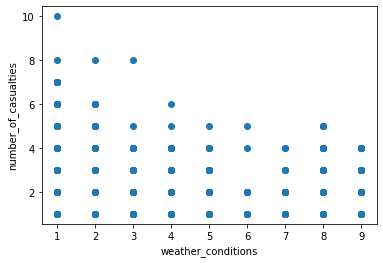

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['weather_conditions'], df['number_of_casualties'])
plt.xlabel('weather_conditions')
plt.ylabel('number_of_casualties')

In statistics, these both datas are known to have a negative covariance. A negative covariance indicates that both variables tend to move away from each other — when one moves upward the other moves downward, and vice versa. 
Though it is to be noted that they don't follow a linear relationship (at weather condition=8 the graph deviates)
 We now see the value using formula

In [ ]:
np.cov(df['weather_conditions'],df['number_of_casualties'])

array([[ 3.30531574, -0.02907564],
       [-0.02907564,  0.40706764]])

This array gives us the following values in sequence: Variance of weather condition, covariance between both, and variance of number of casualties. As expected from the graph above both the datas have a negative covariance.

Now we calculate correlation: The correlation between two random variables measures both the strength and direction of a linear relationship that exists between them. There are two ways to measure correlation:

Pearson Correlation Coefficient — captures the strength and direction of the linear association between two continuous variables

Spearman’s Rank Correlation Coefficient—determines the strength and direction of the monotonic relationship which exists between two ordinal (categorical) or continuous variables.

In [ ]:
df[['weather_conditions','number_of_casualties']].corr()

,weather_conditions,number_of_casualties
weather_conditions,1.000000,-0.025066
number_of_casualties,-0.025066,1.000000


The diagonal values of 1 indicates the correlation of each column to itself. Obviously, the correlation of a to a itself is 1, and so is that for column b. The value of -0.025066 is the Pearson correlation coefficient of a and b.

Like covariance, the sign of the pearson correlation coefficient indicates the direction of the relationship. However, the values of the Pearson correlation coefficient is contrained to be between -1 and 1. Based on the value, you can deduce the following degrees of correlation:

Perfect — values near to ±1; High degree — values between ±0.5 and ±1; Moderate degree — values between ±0.3 and ±0.49; Low degree — values below ±0.29; No correlation — values close to 0

Non parametric test: 

If your data is not linearly distributed, you should use Spearman’s Rank Correlation Coefficient instead of the Pearson Correlation Coefficient. The Spearman’s Rank Correlation Coefficient is designed for distributions that are monotonic.

In algebra, a montonic function is a function whose gradient never changes sign. In other words, it is a function which is either always increasing or decreasing.

In [ ]:
df[['weather_conditions','number_of_casualties']].corr(method='spearman') 

,weather_conditions,number_of_casualties
weather_conditions,1.000000,-0.003455
number_of_casualties,-0.003455,1.000000


Here we have thus completed pair wise association and non-parametric test. We now move onto other parametric tests like t-test, ANOVA and perform the hypothesis testing on these two variables.

We first define the null and alternative hypothesis: 

1. Null Hypothesis: There does not exist any relationship between weather conditions and the number of casualties
2. Alternative hypothesis: There exists some relationship between weather conditions and the number of casualties 

Significance level (alpha)=0.05

In [ ]:
#t test
from scipy import stats
stats.ttest_ind(df.weather_conditions,df.number_of_casualties)

Ttest_indResult(statistic=41.72272242774329, pvalue=0.0)

The Independent t-test results are not significant (p-value smaller than the significant value) Therefore, we can reject the null hypothesis in support of the alternative hypothesis on basis of this test. We move onto Anova

In [ ]:
#ANOVA
fvalue, pvalue = stats.f_oneway(df['weather_conditions'], df['number_of_casualties'])
print(fvalue, pvalue)

1740.7855667825122 0.0


F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value. F test tells us if the means between two populations are significantly different (generally a group of varibles are considered)
Since p is smaller than the significance level (and F value is quite large) hence we reject the null hypothesis
Note: F Significance = variance of the group means / mean of the within group variances (It can be calulcated from the table)

In [ ]:
#Z test
from statsmodels.stats import weightstats as stests
ztest ,pval1 = stests.ztest(df['weather_conditions'], x2=df['number_of_casualties'], value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


0.0
reject null hypothesis


Thus from various test and the hypothesis testing we can say for sure that there exists a relationship between weather conditions and the number of casualties i.e. when we are trying to build a model to determine the number of casualties we cannot ignore the weather conditions parameter (we have to take that variable into consideration)

Like this we can find for various other pairs of data in the dataset. 

Conclusion: Hence we have successfully completed all the requirements of this experiment.